In [1]:
import torch
import numpy as np
import math
from d2l import torch as d2l
from torch import nn


In [2]:
max_degree = 20
n_train, n_test = 100, 100
true_w = np.zeros(max_degree)
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])


In [3]:
true_w

array([ 5. ,  1.2, -3.4,  5.6,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [4]:
features = np.random.normal(size=(n_train + n_test, 1))

In [5]:
features

array([[ 0.77460137],
       [ 0.70457263],
       [-0.13660119],
       [-0.17333426],
       [-2.2843309 ],
       [ 1.03174896],
       [-0.04778893],
       [-0.64358458],
       [ 0.51357258],
       [ 0.85564007],
       [-0.15321409],
       [-0.02216821],
       [-0.11106281],
       [-1.02234192],
       [-0.11029102],
       [-2.10240772],
       [ 0.05451917],
       [ 1.63801109],
       [-0.49598692],
       [ 0.54984246],
       [ 1.9656656 ],
       [-0.15193055],
       [ 1.35582208],
       [ 0.78261852],
       [-0.23778814],
       [-0.28791757],
       [ 0.53294323],
       [-0.75637759],
       [ 0.62002872],
       [-0.60368716],
       [ 0.02729905],
       [-1.18922237],
       [-0.19949662],
       [-0.19249559],
       [-0.27280742],
       [ 0.28122848],
       [-2.51877677],
       [ 0.72284801],
       [-0.13336544],
       [-1.88432584],
       [ 1.02129851],
       [-0.421439  ],
       [ 0.67284424],
       [ 0.62134132],
       [ 0.61358348],
       [ 2

In [6]:
np.random.shuffle(features)

In [7]:
features

array([[-0.91860788],
       [ 0.51357258],
       [ 0.46986456],
       [-0.16030416],
       [ 0.50563429],
       [-0.64358458],
       [ 1.21177274],
       [-0.44726118],
       [ 0.28134372],
       [ 0.91683857],
       [-0.56238874],
       [-1.32163479],
       [ 0.38262774],
       [-1.41432635],
       [-0.15690841],
       [-1.62472529],
       [ 2.74395903],
       [ 2.1726723 ],
       [ 0.77460137],
       [ 0.94593906],
       [ 0.67284424],
       [ 0.81243975],
       [-0.56702385],
       [ 0.9768715 ],
       [ 0.97303361],
       [-2.02092724],
       [ 1.97340522],
       [ 0.53294323],
       [ 0.66184801],
       [ 0.70457263],
       [ 0.40002433],
       [-0.421439  ],
       [-0.34383026],
       [-1.27173146],
       [ 0.78261852],
       [ 1.66213464],
       [ 0.62965007],
       [-0.11106281],
       [ 0.77172122],
       [ 0.72284801],
       [ 0.99920625],
       [-2.13135307],
       [ 1.04938936],
       [-1.60528584],
       [ 1.97967433],
       [-1

In [8]:
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))

In [9]:
poly_features[0, :]

array([ 1.        , -0.91860788,  0.84384045, -0.77515849,  0.7120667 ,
       -0.65411008,  0.60087068, -0.55196454,  0.50703898, -0.46577001,
        0.42786   , -0.39303557,  0.36104557, -0.33165931,  0.30466486,
       -0.27986754,  0.25708853, -0.23616355,  0.2169417 , -0.19928435])

In [10]:
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)

In [11]:
poly_features[0, :]

array([ 1.00000000e+00, -9.18607884e-01,  4.21920223e-01, -1.29193081e-01,
        2.96694457e-02, -5.45091735e-03,  8.34542609e-04, -1.09516774e-04,
        1.25753715e-05, -1.28353727e-06,  1.17906746e-07, -9.84636967e-09,
        7.53746067e-10, -5.32613139e-11,  3.49473306e-12, -2.14019289e-13,
        1.22874879e-14, -6.63963722e-16,  3.38845728e-17, -1.63824399e-18])

In [20]:
labels = np.dot(poly_features, true_w)

In [21]:
labels += np.random.normal(scale=0.1, size=labels.shape)

In [22]:
labels

array([ 6.67641574e+00, -1.58070932e+01, -1.44922913e+01,  8.60973676e+00,
        1.44188098e+00,  5.65348099e+00,  9.08625261e+00, -1.27960662e+01,
        3.19176009e+00,  4.70626130e+00,  4.43908352e+00,  5.13641978e+00,
        5.33337738e+00,  6.46137904e+00,  2.29470134e+00,  2.61108797e+00,
        6.10693432e+00,  5.47596560e+00,  5.69133147e+00,  5.21307164e+00,
       -1.57652784e+01,  4.83123613e+00,  4.54444373e+00,  5.13282949e+00,
        2.98497073e+00,  4.65853321e+00,  5.15162071e+00,  3.43996245e+00,
       -6.27442322e+00, -1.04282838e+01,  4.20377585e+00,  4.50674549e+00,
        5.21121238e+00,  3.36094183e+00, -1.87009635e+01,  5.36936015e+00,
        4.90370208e+00,  4.74106286e+00, -7.52404263e+00,  5.75209656e+00,
        5.28746885e+00,  5.25767144e+00,  5.56937849e+00,  4.18007024e+00,
       -2.60702523e+00,  2.73864066e+00, -4.22875617e+00, -2.19267532e+00,
        5.33502423e+00, -1.41165437e+00,  5.50240380e+00, -1.79432978e+00,
        5.13364188e+00,  

In [23]:
true_w, features, poly_features, labels = [torch.tensor(x, dtype=torch.float32) for x in [true_w, features, poly_features, labels]]

In [23]:
features[:2], poly_features[:2], labels[:2]

(tensor([[-0.5702],
         [ 0.6934]]),
 tensor([[ 1.0000e+00, -5.7021e-01,  1.6257e-01, -3.0899e-02,  4.4047e-03,
          -5.0232e-04,  4.7737e-05, -3.8886e-06,  2.7716e-07, -1.7560e-08,
           1.0013e-09, -5.1903e-11,  2.4663e-12, -1.0818e-13,  4.4059e-15,
          -1.6748e-16,  5.9688e-18, -2.0020e-19,  6.3420e-21, -1.9033e-22],
         [ 1.0000e+00,  6.9344e-01,  2.4043e-01,  5.5575e-02,  9.6346e-03,
           1.3362e-03,  1.5443e-04,  1.5298e-05,  1.3261e-06,  1.0217e-07,
           7.0852e-09,  4.4665e-10,  2.5811e-11,  1.3768e-12,  6.8195e-14,
           3.1526e-15,  1.3663e-16,  5.5734e-18,  2.1471e-19,  7.8365e-21]]),
 tensor([3.5840, 5.3812]))

In [24]:
def evaluate_loss(net, data_iter, loss):
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [25]:
def train(train_features, test_features, train_labels, test_labels, num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_features.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)), batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)), batch_size)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2], legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss), evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())
    

weight: [[ 4.982504   1.2149547 -3.392598   5.572344 ]]


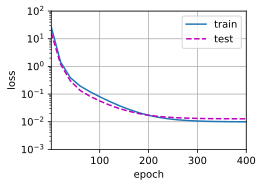

In [26]:
train(poly_features[:n_train, :4], poly_features[n_train:, :4], labels[:n_train], labels[n_train:])

weight: [[2.956395 4.177357]]


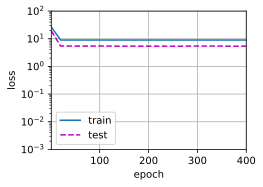

In [28]:
train(poly_features[:n_train, :2], poly_features[n_train:, :2], labels[:n_train], labels[n_train:])

weight: [[ 4.9433455   1.2680238  -3.220864    5.194634   -0.45354557  1.2953161
  -0.063592    0.27656376 -0.04434422  0.22619002 -0.12009904  0.0852785
   0.15981497 -0.1947682  -0.09103574 -0.07991186 -0.19246839 -0.12040734
  -0.13876063  0.07488713]]


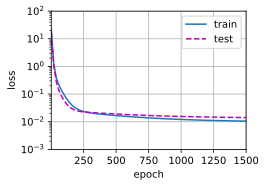

In [30]:
train(poly_features[:n_train, :], poly_features[n_train:, :], labels[:n_train], labels[n_train:], num_epochs=1500)